In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Create sample sales data
np.random.seed(42)

dates = pd.date_range(start='2024-01-01', end='2024-03-31', freq='D')
products = ['Laptop', 'Smartphone', 'Tablet', 'Headphones', 'Smartwatch']
cities = ['Mumbai', 'Delhi', 'Bangalore', 'Kolkata', 'Chennai']

data = {
    'Date': np.random.choice(dates, 200),
    'City': np.random.choice(cities, 200),
    'Product': np.random.choice(products, 200),
    'Quantity': np.random.randint(1, 5, 200),
    'Price_per_Unit': np.random.randint(5000, 50000, 200)
}

df = pd.DataFrame(data)
df['Total_Sale'] = df['Quantity'] * df['Price_per_Unit']

print(df.head())


        Date       City     Product  Quantity  Price_per_Unit  Total_Sale
0 2024-02-21    Kolkata      Laptop         1           27928       27928
1 2024-01-15      Delhi      Tablet         1           24198       24198
2 2024-03-12  Bangalore  Headphones         2           24758       49516
3 2024-03-01     Mumbai  Smartphone         4           20254       81016
4 2024-01-21    Chennai  Smartphone         2           49238       98476


In [3]:
# Basic summary
print(df.info())
print(df.describe())

# Missing values
print("Missing values:\n", df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            200 non-null    datetime64[ns]
 1   City            200 non-null    object        
 2   Product         200 non-null    object        
 3   Quantity        200 non-null    int32         
 4   Price_per_Unit  200 non-null    int32         
 5   Total_Sale      200 non-null    int32         
dtypes: datetime64[ns](1), int32(3), object(2)
memory usage: 7.2+ KB
None
                      Date    Quantity  Price_per_Unit     Total_Sale
count                  200  200.000000       200.00000     200.000000
mean   2024-02-15 20:45:36    2.320000     25812.65500   59623.635000
min    2024-01-01 00:00:00    1.000000      5009.00000    6062.000000
25%    2024-01-24 00:00:00    1.000000     15198.50000   24888.750000
50%    2024-02-17 12:00:00    2.000000     24189.50000  

C:\Users\nisha\AppData\Local\Temp\ipykernel_8556\3461447716.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_sales.index, y=product_sales.values, palette='viridis')


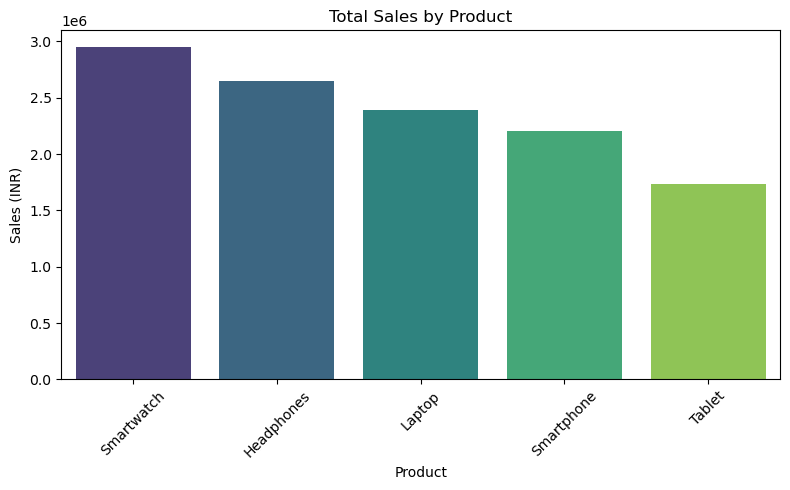

In [4]:
product_sales = df.groupby('Product')['Total_Sale'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=product_sales.index, y=product_sales.values, palette='viridis')
plt.title('Total Sales by Product')
plt.ylabel('Sales (INR)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


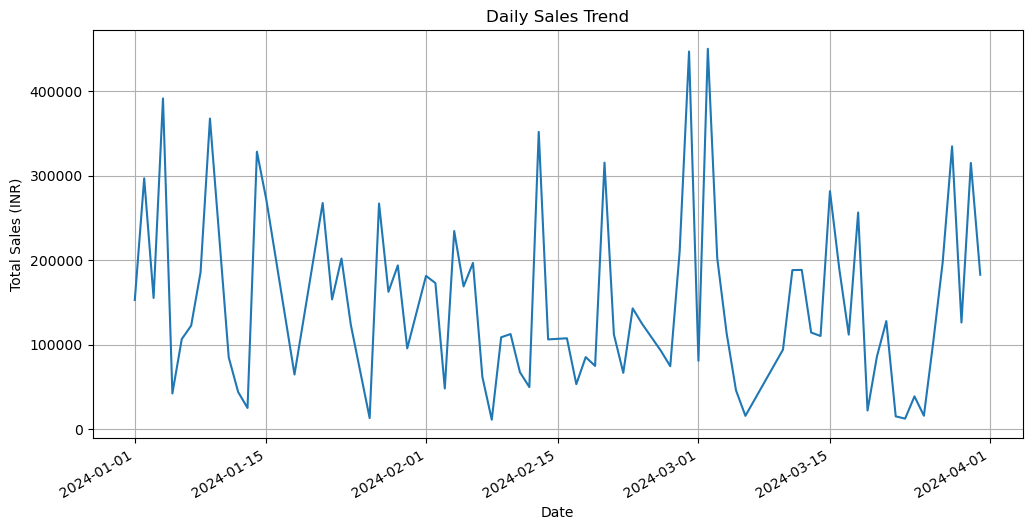

In [5]:
daily_sales = df.groupby('Date')['Total_Sale'].sum()

plt.figure(figsize=(12,6))
daily_sales.plot()
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales (INR)')
plt.grid(True)
plt.show()


C:\Users\nisha\AppData\Local\Temp\ipykernel_8556\250970208.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_sales.index, y=city_sales.values, palette='coolwarm')


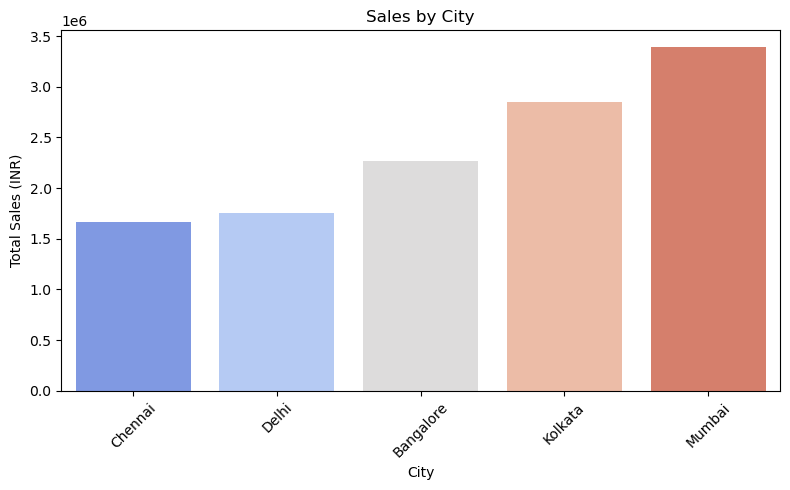

In [6]:
city_sales = df.groupby('City')['Total_Sale'].sum().sort_values()

plt.figure(figsize=(8,5))
sns.barplot(x=city_sales.index, y=city_sales.values, palette='coolwarm')
plt.title('Sales by City')
plt.ylabel('Total Sales (INR)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [7]:
print("Top selling product:", product_sales.idxmax())
print("City with highest sales:", city_sales.idxmax())
print("Total revenue:", df['Total_Sale'].sum())
print("Average daily revenue:", daily_sales.mean())


Top selling product: Smartwatch
City with highest sales: Mumbai
Total revenue: 11924727
Average daily revenue: 150945.91139240508
